In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Numpy Operations

### 1.1 Create an array and perform elementwise operations

In [2]:
arr_1 = np.array([1, 2, 3])
arr_2 = np.array([4, 5, 6])

add_res = arr_1 + arr_2
sub_res = arr_1 - arr_2
mul_res = arr_1 * arr_2
div_res = arr_1 / arr_2

print("add: ", add_res)
print("subtract: ", sub_res)
print("multiply: ", mul_res)
print("divide ", div_res)

add:  [5 7 9]
subtract:  [-3 -3 -3]
multiply:  [ 4 10 18]
divide  [0.25 0.4  0.5 ]


### 1.2 Compare loop vs vectorized execution

In [3]:
import time
large_arr_1 = np.random.rand(1000000)
large_arr_2 = np.random.rand(1000000)

# Loop
result = np.empty(len(large_arr_1))
start_time = time.time()
for i in range(len(large_arr_1)):
    result[i] = large_arr_1[i] + large_arr_2[i]
loop_time = time.time() - start_time

# Vectorized
start_time_vec = time.time()
result_vec = large_arr_1 + large_arr_2
vec_time = time.time() - start_time_vec

print("loop time is: %.2fs" % loop_time)
print("vectorized time is: %.2fs" % vec_time)
print("vectorized execution is %.2fs faster than loop." % (loop_time-vec_time))

loop time is: 0.15s
vectorized time is: 0.00s
vectorized execution is 0.15s faster than loop.


## 2. Dataset Loading

### 2.1 Load provided CSV using pandas

In [40]:
data = pd.read_csv('../data/raw/starter_data.csv', parse_dates = ['date'])
data

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05
5,C,30,2025-08-06
6,A,11,2025-08-07
7,B,14,2025-08-08
8,C,28,2025-08-09
9,A,13,2025-08-10


### 2.2 Inspect with .info() and .head()

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  10 non-null     object        
 1   value     10 non-null     int64         
 2   date      10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 372.0+ bytes


In [42]:
data.head()

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


## 3. Summary Statistics

### 3.1 calculate .describe() for numeric columns

In [43]:
data.value.describe()

count    10.000000
mean     17.600000
std       7.381659
min      10.000000
25%      12.250000
50%      14.500000
75%      23.250000
max      30.000000
Name: value, dtype: float64

### 3.2 Perform .groupby() aggregation by category

In [44]:
data.groupby('category').agg({'value': ['sum', 'mean']})

value           
           sum       mean
category                 
A           46  11.500000
B           47  15.666667
C           83  27.666667

## 4. Save Outputs

### 4.1 Save summary stats to data/processed/summary.csv or .json

In [45]:
summary_data = data.describe()
summary_data.to_csv('../data/processed/summary.csv')

### 4.2 Bonus: Create and save a basic plot

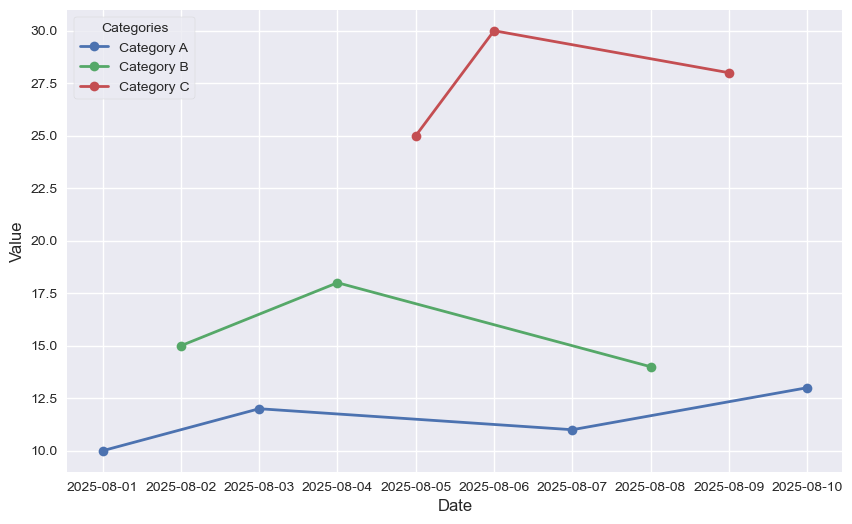

In [49]:
from matplotlib.dates import DateFormatter

groups = data.groupby('category')

plt.figure(figsize=(10, 6))

for name, group in groups:
    plt.plot(group['date'], 
             group['value'], 
             marker='o', 
             label=f'Category {name}',
             linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Categories', frameon=True)

plt.savefig('../figs/hw03_python_fundamentals_fig1.png', dpi=300)
plt.show()

## 5. Reusable Functions

### 5.1 Write at least one utility function

In [50]:
def get_summary_stats(df):
    return df.describe()

### 5.2 Bonus: Move fuction to src/utils.py and import in notebook